<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***
* **Full Name** = Sarah Qin
* **UCID** = 10156892
***

<font color='Blue'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [37]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()


## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [38]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

models = {
    'DT': DecisionTreeRegressor(max_depth=5, random_state=0), 
    'RF': RandomForestRegressor(max_depth=5,random_state=0), 
    'GB': GradientBoostingRegressor(max_depth=5,random_state=0)
}

results = { 'Train Score': [], 'Test Score': []}

for model in models:

    score = cross_validate(models[model], X, y, scoring='neg_mean_squared_error', return_train_score=True)
    train_score = score['train_score']
    test_score = score['test_score']
    results['Train Score'].append(-train_score.mean())
    results['Test Score'].append(-test_score.mean())

results = pd.DataFrame(results, index= models.keys())
    
results


,Train Score,Test Score
DT,47.918561,163.087775
RF,32.055432,156.404972
GB,3.739270,99.360259


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

In [39]:
# TO DO: ADD YOUR CODE HERE
# This would be similar to the main step, the main difference is the scoring.

models = {
    'DT': DecisionTreeRegressor(max_depth=5, random_state=0), 
    'RF': RandomForestRegressor(max_depth=5,random_state=0), 
    'GB': GradientBoostingRegressor(max_depth=5,random_state=0)
}

results = { 'Train Score': [], 'Test Score': []}

for model in models:

    score = cross_validate(models[model], X, y, scoring='r2', return_train_score=True)
    train_score = score['train_score']
    test_score = score['test_score']
    results['Train Score'].append(train_score.mean())
    results['Test Score'].append(test_score.mean())

results = pd.DataFrame(results, index= models.keys())
    
results

,Train Score,Test Score
DT,0.822887,0.176210
RF,0.881221,0.173748
GB,0.986436,0.473701


## Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

<font color='Green'><b>YOUR ANSWERS HERE</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [40]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

print("Size of X and y: ")
print(X.size, y.size)

print("Type of X and y: ")
print(type(X), type(y))


Size of X and y: 
2314 178
Type of X and y: 
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [41]:
# TO DO: ADD YOUR CODE HERE

X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [42]:
# TO DO: ADD YOUR CODE HERE

print(X.isnull().values.any())

False


How many samples do we have of each type of wine?

In [43]:
# TO DO: ADD YOUR CODE HERE

y.value_counts()

class
2        71
1        59
3        48
Name: count, dtype: int64

## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [50]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

dtr = DecisionTreeClassifier(max_depth=3, random_state=0)
svc = SVC(random_state=0)

results = { 'Train Score': [], 'Test Score': []}

dtr_score = cross_validate(dtr, X, y, scoring='accuracy', return_train_score=True)    
dtr_train_score = dtr_score['train_score']
dtr_test_score = dtr_score['test_score']

results['Train Score'].append(dtr_train_score.mean())
results['Test Score'].append(dtr_test_score.mean())

svc_score = cross_validate(svc, X, y, scoring='accuracy', return_train_score=True)
svc_train_score = svc_score['train_score']
svc_test_score = svc_score['test_score']

results['Train Score'].append(svc_train_score.mean())
results['Test Score'].append(svc_test_score.mean())

results = pd.DataFrame(results, index= ['DTR', 'SVC'])

results


c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataC

,Train Score,Test Score
DTR,0.974756,0.893175
SVC,0.703743,0.663492


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [52]:
# TO DO: Implement best model

from sklearn.metrics import confusion_matrix

svc.fit(X, y)

y_pred = svc.predict(X)

confusion = confusion_matrix(y, y_pred)


c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

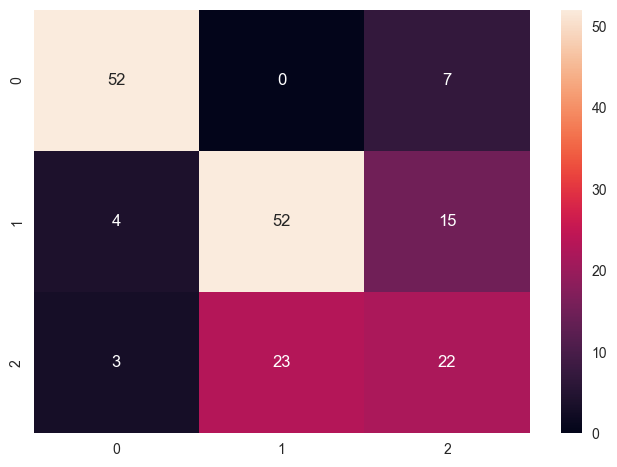

In [53]:
# TO DO: Print confusion matrix using a heatmap

sns.heatmap(confusion, annot=True, fmt='d')

In [54]:
# TO DO: Print classification report

from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        59
           2       0.69      0.73      0.71        71
           3       0.50      0.46      0.48        48

    accuracy                           0.71       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.70      0.71      0.71       178



## Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2?
1. In this case, is maximizing precision or recall more important? Why?


<font color='Green'><b>YOUR ANSWERS HERE</b></font>

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

<font color='Green'><b>DESCRIBE YOUR PROCESS HERE</b></font>

# **Part 3: Observations/Interpretation (3 marks)**

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

<font color='Green'><b>
ADD YOUR FINDINGS HERE
</b></font>

## **Part 4:** Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

<font color='Green'><b>
ADD YOUR THOUGHTS HERE
</b></font>

## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [48]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*